In [666]:
import keras as K
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf

In [667]:
num_features = 784
batch_size = 100
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто', 
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

In [668]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

X_train, X_test = X_train / 255., X_test / 255.

In [669]:
y_test.shape

(10000,)

In [670]:
model = K.Sequential([
    K.layers.Flatten(input_shape=(28, 28)),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(256, activation='tanh'),
    K.layers.Dropout(0.2),
    K.layers.Dense(512, activation='softmax'),
    K.layers.Flatten(),
    K.layers.Dense(1024, activation='softmax'),
    K.layers.Dense(10)
])

c:\Users\egork\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [671]:
model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.Adam(0.001),
    metrics=[K.metrics.SparseCategoricalAccuracy()]
)

In [672]:
model.summary()

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_70 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_71 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,650 (3.05 MB)

 Trainable params: 800,650 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [673]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 2.1826 - sparse_categorical_accuracy: 0.1476 - val_loss: 1.7591 - val_sparse_categorical_accuracy: 0.1998
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 1.7386 - sparse_categorical_accuracy: 0.1998 - val_loss: 1.6761 - val_sparse_categorical_accuracy: 0.2898
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - loss: 1.5936 - sparse_categorical_accuracy: 0.2879 - val_loss: 1.4710 - val_sparse_categorical_accuracy: 0.3000
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 1.4579 - sparse_categorical_accuracy: 0.2970 - val_loss: 1.4500 - val_sparse_categorical_accuracy: 0.2979
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 1.3956 - sparse_categorical_accuracy: 0.3564 - val_loss: 1.2133 - val_sparse_categorical_accuracy: 0.3938
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 1.1868 - sparse_categorical_accuracy: 0.4001 - val_loss: 1.1551 - val_sparse_categorica

In [674]:
import matplotlib.pyplot as plt

def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


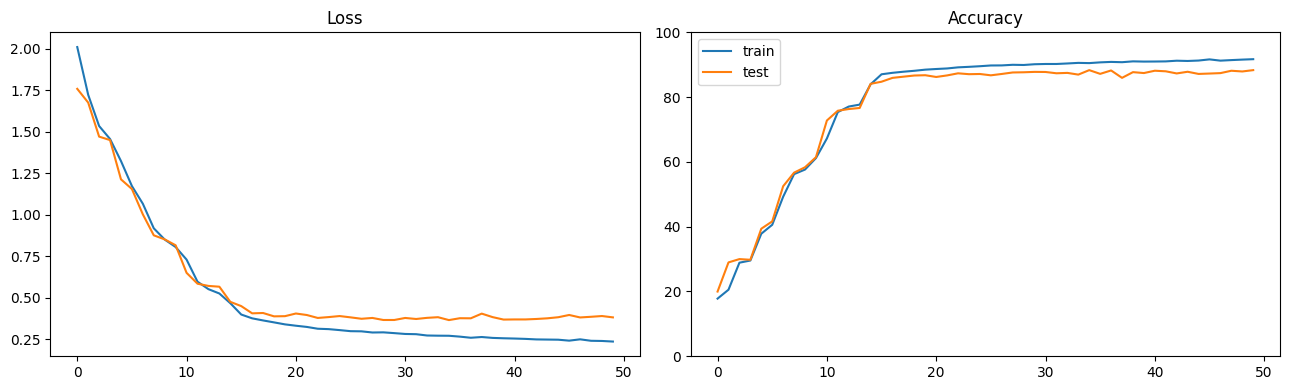

In [675]:
plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


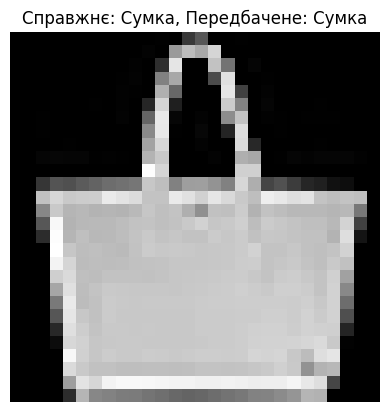

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


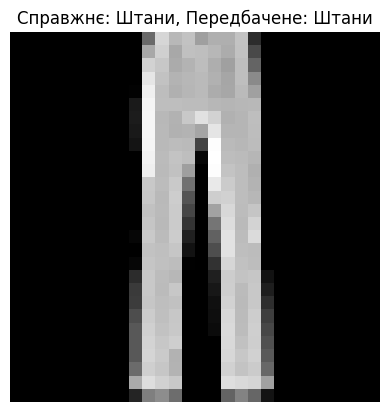

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


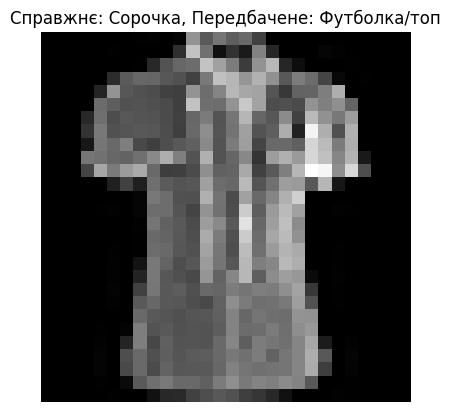

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


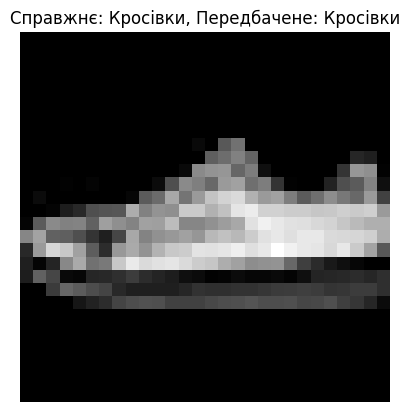

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


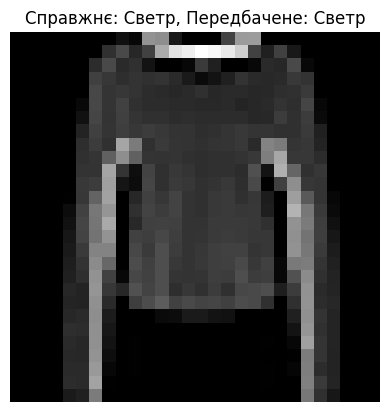

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


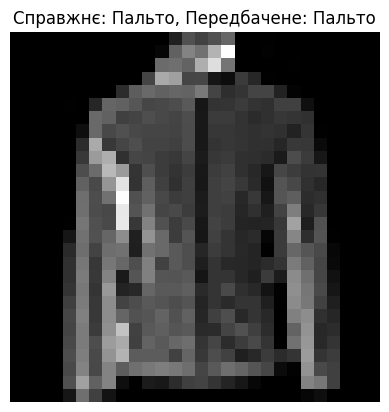

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


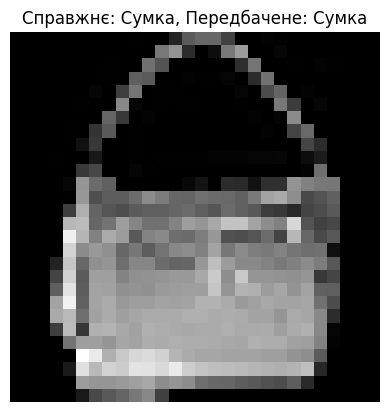

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


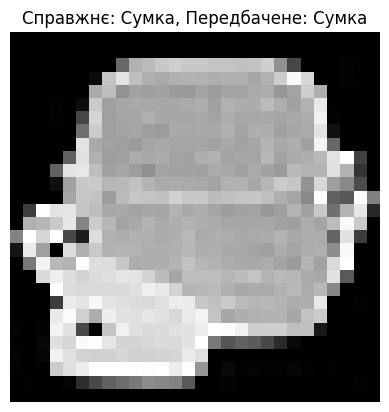

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


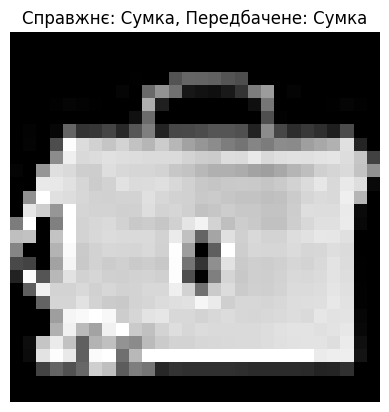

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


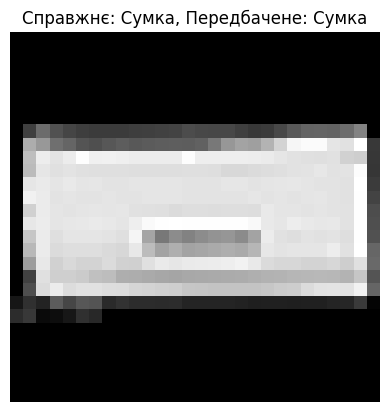

In [676]:
import random

for i in range(10):
    image_idx = random.randint(0, len(X_test))
    image = X_test[image_idx]
    image_reshaped = np.expand_dims(image, axis=(0, -1))
    predicted = model.predict(image_reshaped)
    true_test = y_test[image_idx]

    plt.imshow(image, cmap='gray')
    plt.title(f"Справжнє: {class_names[true_test]}, Передбачене: {class_names[np.argmax(predicted)]}")
    plt.axis('off')
    plt.show()